# Visual data analysis in Python

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
#Lectura de data
df = pd.read_csv("C:/Users/sebas/Documents/Ciencia de datos para aplicaciones espaciales - CONIDA/Proyecto Final/deforestation_dateset.csv")
df_1 = pd.read_csv("C:/Users/sebas/Documents/Ciencia de datos para aplicaciones espaciales - CONIDA/data/CovidMINSA.csv", sep=';')

In [3]:
df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [4]:
df_1.head()

,UBIGEO,DISTRITO,F_FEMENINO,F_MASCULINO,Fallecido,CP_FEMENINO,CP_MASCULINO,Caso_Positivo,Centro_vacu,pfiser
0,150101,LIMA,653,1364,2017,16698,17084,33782,1,0
1,150102,ANCON,26,87,113,664,807,1471,1,1
2,150103,ATE,489,959,1448,9017,10313,19330,1,1
3,150104,BARRANCO,57,98,155,939,750,1689,1,0
4,150105,BREÑA,157,307,464,1902,1682,3584,1,0


## 1. Visualización univariada

El análisis univariado se enfoca en examinar una característica a la vez. Cuando analizamos una característica de manera independiente, generalmente estamos principalmente interesados en la distribución de sus valores y no tenemos en cuenta otras características en el conjunto de datos.

### 1.1 Características cuantitativas

**Histogramas y Gráficos de Densidad**

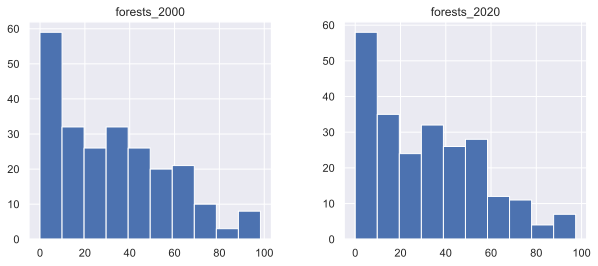

In [5]:
features = ["forests_2000", "forests_2020"]
df[features].hist(figsize=(10, 4));  #Histograma

Un histograma agrupa valores en intervalos de igual rango de valores. La forma del histograma puede contener indicios sobre el tipo de distribución subyacente: Gaussiana, exponencial, etc. También puedes identificar cualquier asimetría en su forma cuando la distribución es casi regular pero tiene algunas anomalías. Conocer la distribución de los valores de una característica se vuelve importante cuando se utilizan métodos de aprendizaje automático que asumen un tipo particular (generalmente Gaussiano)

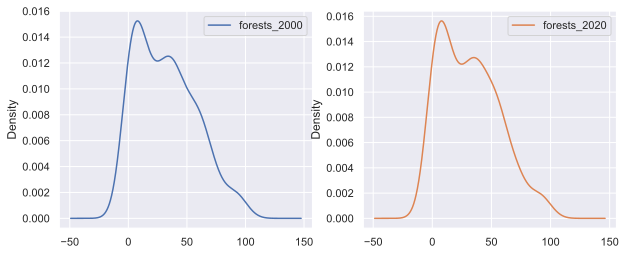

In [6]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

También es posible graficar la distribución de observaciones utilizando la función `distplot()` de seaborn. El gráfico muestra el histograma con una estimación de densidad del núcleo (KDE) en la parte superior.

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


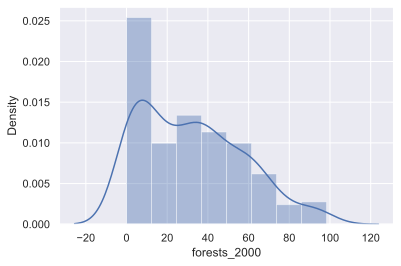

In [7]:
sns.distplot(df["forests_2000"]);

En este caso, la altura de las barras del histograma está normalizada y muestra la densidad en lugar del número de ejemplos en cada intervalo.

**BoxPlots**

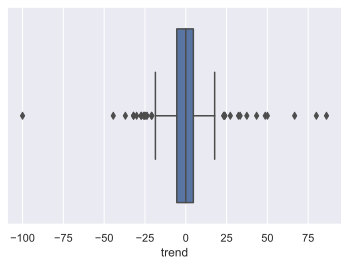

In [8]:
sns.boxplot(x="trend", data=df);

Veamos cómo interpretar un diagrama de caja (box plot). Sus componentes incluyen una caja (obviamente, de ahí su nombre "box plot"), las llamadas "whiskers" (o "bigotes"), y una serie de puntos individuales (llamados "outliers").

La caja por sí sola ilustra la dispersión intercuartil de la distribución; su longitud está determinada por los percentiles Q1 (primer cuartil) y Q3 (tercer cuartil). La línea vertical dentro de la caja marca la mediana (Q2) de la distribución.

Los "whiskers" son las líneas que se extienden desde la caja. Representan la totalidad de la dispersión de los puntos de datos, específicamente los puntos que caen dentro del intervalo (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), donde IQR es el rango intercuartil (IQR = Q3 - Q1).

Los "outliers" (valores atípicos) que caen fuera del rango delimitado por los "whiskers" se representan individualmente como puntos negros a lo largo del eje central.

**Violin Plot**

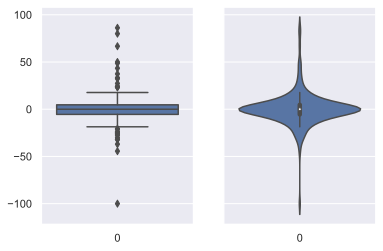

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["trend"], ax=axes[0])
sns.violinplot(data=df["trend"], ax=axes[1]);

En resumen, los diagramas de caja son útiles para resumir estadísticas clave y detectar valores atípicos, mientras que los gráficos de violín son más adecuados para comprender la forma y la densidad de la distribución de datos en su totalidad.

### 1.2 Características categóricas y binarias

 Las **características categóricas**, también conocidas como variables nominales, representan categorías o etiquetas que no tienen ningún orden o clasificación inherente.

Las **características binarias** son un subtipo de características categóricas que solo pueden tomar dos valores distintos, generalmente codificados como 0 y 1. Solo hay dos categorías posibles y se utilizan comúnmente en problemas de clasificación binaria.

Si los valores de una variable categórica están ordenados, se denomina ordinal.

**Tabla de Frecuencias**

In [10]:
df_1["pfiser"].value_counts()

0    23
1    20
Name: pfiser, dtype: int64

Vamos a verificar el equilibrio de clases en nuestro conjunto de datos observando la distribución de la variable objetivo: la tasa de pfiser (vacuna). Primero, obtendremos una tabla de frecuencias, que muestra cuán frecuente es cada valor de la variable categórica. Para ello, utilizaremos el método `value_counts()`

**Gráfico de barras**

El gráfico de barras es una representación gráfica de la tabla de frecuencias. La forma más sencilla de crearlo es utilizando la función `countplot()` de seaborn. Existe otra función en seaborn que se llama de manera algo confusa `barplot()`, que se utiliza principalmente para representar algunas estadísticas básicas de una variable numérica agrupada por una característica categórica.

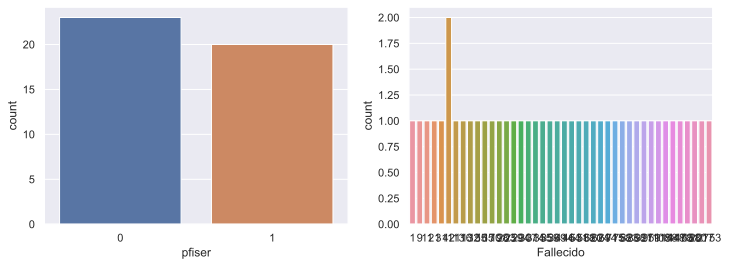

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="pfiser", data=df_1, ax=axes[0])
sns.countplot(x="Fallecido", data=df_1, ax=axes[1]);

Aunque los histogramas, discutidos anteriormente, y los gráficos de barras pueden parecer similares, existen varias diferencias entre ellos:

- Los histogramas son más adecuados para analizar la distribución de variables numéricas, mientras que los gráficos de barras se utilizan para características categóricas.

- Los valores en el eje X del histograma son numéricos; un gráfico de barras puede tener cualquier tipo de valores en el eje X: números, cadenas de texto, valores booleanos.

- El eje X del histograma es un eje de coordenadas cartesianas en el que los valores no pueden cambiarse; el orden de las barras no está predefinido. Aun así, es útil destacar que las barras a menudo se ordenan por altura, es decir, la frecuencia de los valores. Además, cuando se consideran variables ordinales (como las llamadas al servicio al cliente en nuestros datos), las barras suelen ordenarse por el valor de la variable.

## 2. Visualización multivariante

Los gráficos multivariados nos permiten ver las relaciones entre dos o más variables diferentes, todo en una sola figura. Al igual que en el caso de los gráficos univariados, el tipo específico de visualización dependerá de los tipos de variables que se estén analizando.

### 2.1 Cuantitativo vs Cuantitativo

**Matriz de correlación**

Vamos a analizar las correlaciones entre las variables numéricas en nuestro conjunto de datos. Esta información es importante, ya que existen algoritmos de Aprendizaje Automático (por ejemplo, regresión lineal y regresión logística) que no manejan bien las variables de entrada altamente correlacionadas.

Primero, utilizaremos el método `corr()` en un DataFrame que calcula la correlación entre cada par de características. Luego, pasaremos la matriz de correlación resultante a `heatmap()` de seaborn, que representa una matriz codificada por colores para los valores proporcionados:

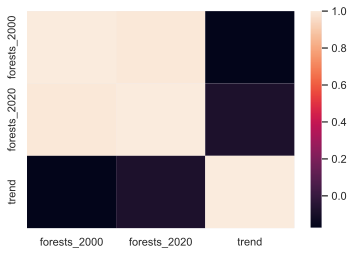

In [12]:
# Datos numéricos de la data
numerical = list(set(df.columns) - set(["iso3c"]))
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);


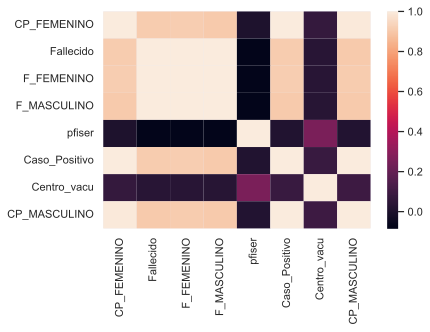

In [13]:
# Datos numéricos de la data, excluyendo "Distrito" si no es relevante
numerical_1 = list(set(df_1.columns) - set(["Distrito", "UBIGEO"]))
# Calculate and plot
corr_matrix = df_1[numerical_1].corr()
sns.heatmap(corr_matrix);

**Scatter Plot (dispersión)**

El gráfico de dispersión muestra los valores de dos variables numéricas como coordenadas cartesianas en un espacio 2D. También son posibles los gráficos de dispersión en 3D.

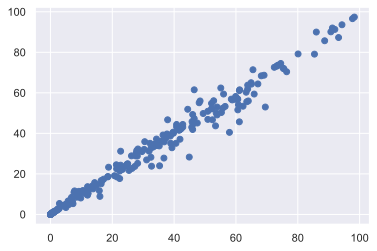

In [14]:
plt.scatter(df["forests_2000"], df["forests_2020"]);

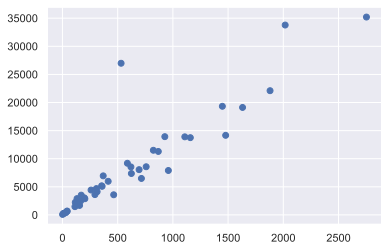

In [15]:
plt.scatter(df_1["Fallecido"], df_1["Caso_Positivo"]);

Ahora con la librería seaborn

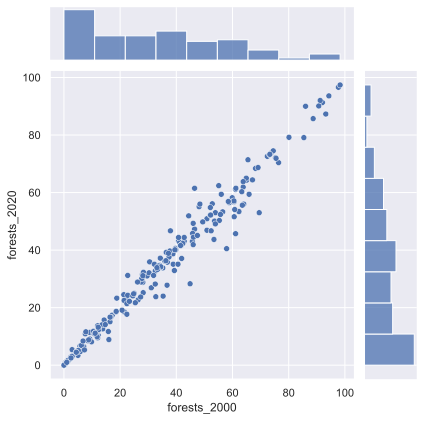

In [16]:
sns.jointplot(x="forests_2000", y="forests_2020", data=df, kind="scatter");

La función `jointplot()` crea dos histogramas que pueden ser útiles en algunos casos.
Utilizando la misma función, también podemos obtener una versión suavizada de nuestra distribución bivariada:

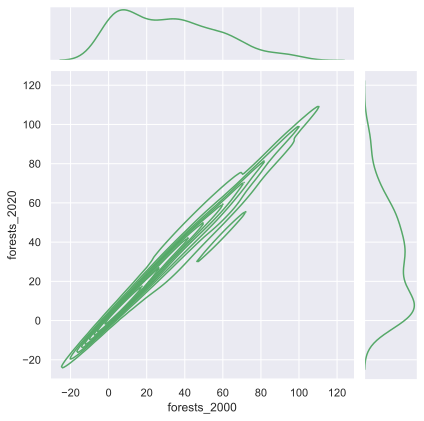

In [17]:
sns.jointplot(x="forests_2000", y="forests_2020", data=df, kind="kde", color="g");

**Scatterplot matrix**

En algunos casos, es posible que deseemos representar una matriz de gráficos de dispersión como la que se muestra a continuación. Su diagonal contiene las distribuciones de las variables correspondientes, y los gráficos de dispersión para cada par de variables llenan el resto de la matriz.

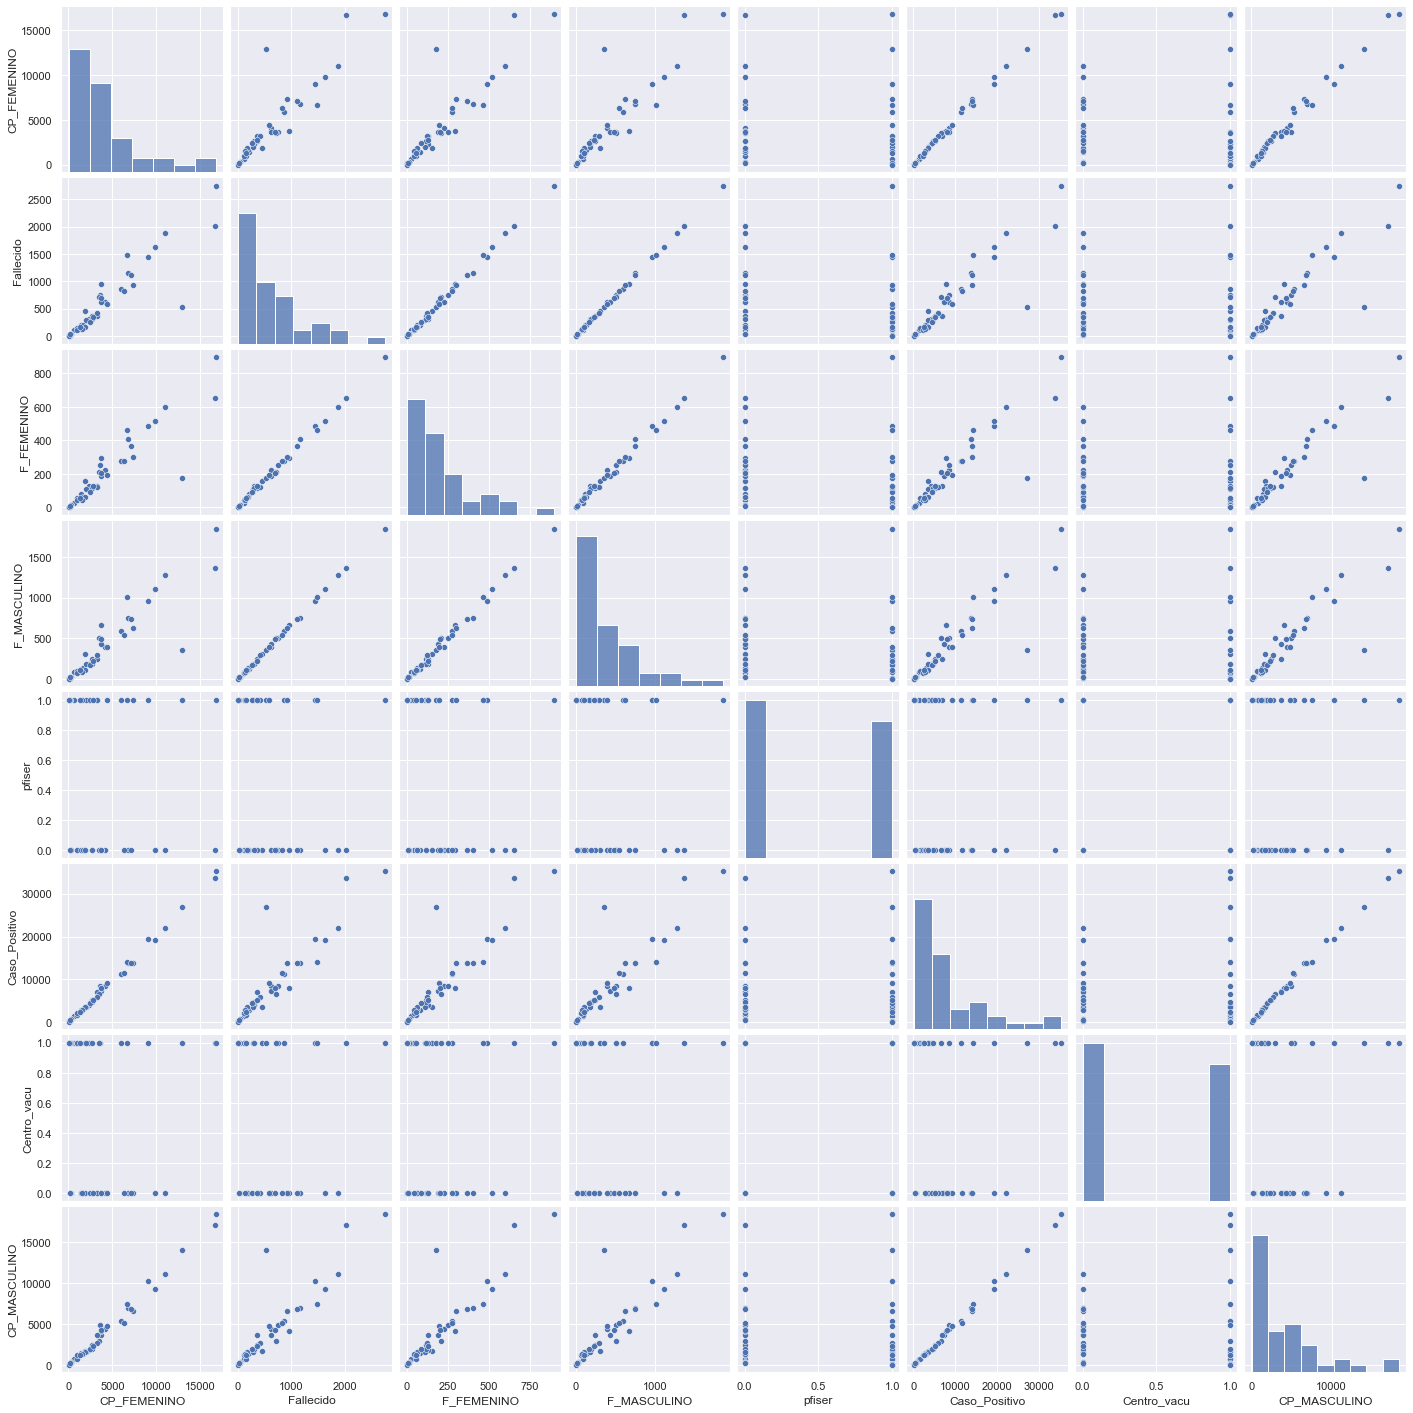

In [18]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_1[numerical_1]);

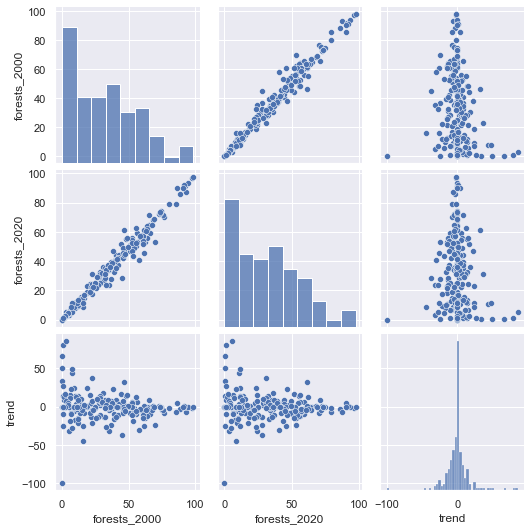

In [19]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

### 2.2 Cuantitativo vs Categórico

Anteriormente, aprendiste acerca de los gráficos de dispersión. Además, sus puntos pueden codificarse por color o tamaño para que los valores de una tercera variable categórica también se presenten en la misma figura. Podemos lograr esto con la función `scatter()` que viste anteriormente, pero intentemos una nueva función llamada `lmplot()` y usemos el parámetro `hue` para indicar nuestra característica categórica de interés:

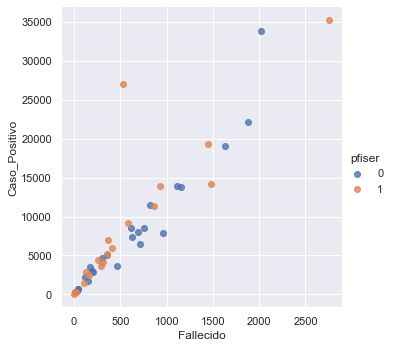

In [20]:
sns.lmplot(
    x="Fallecido", y="Caso_Positivo", data=df_1, hue="pfiser", fit_reg=False
);

Ahora, creemos gráficos de caja (box plots) para visualizar las estadísticas de distribución de las variables numéricas en dos grupos distintos: los vacunados(pfiser = 1) y aquellos que no se vacunaron (pfiser = 0).

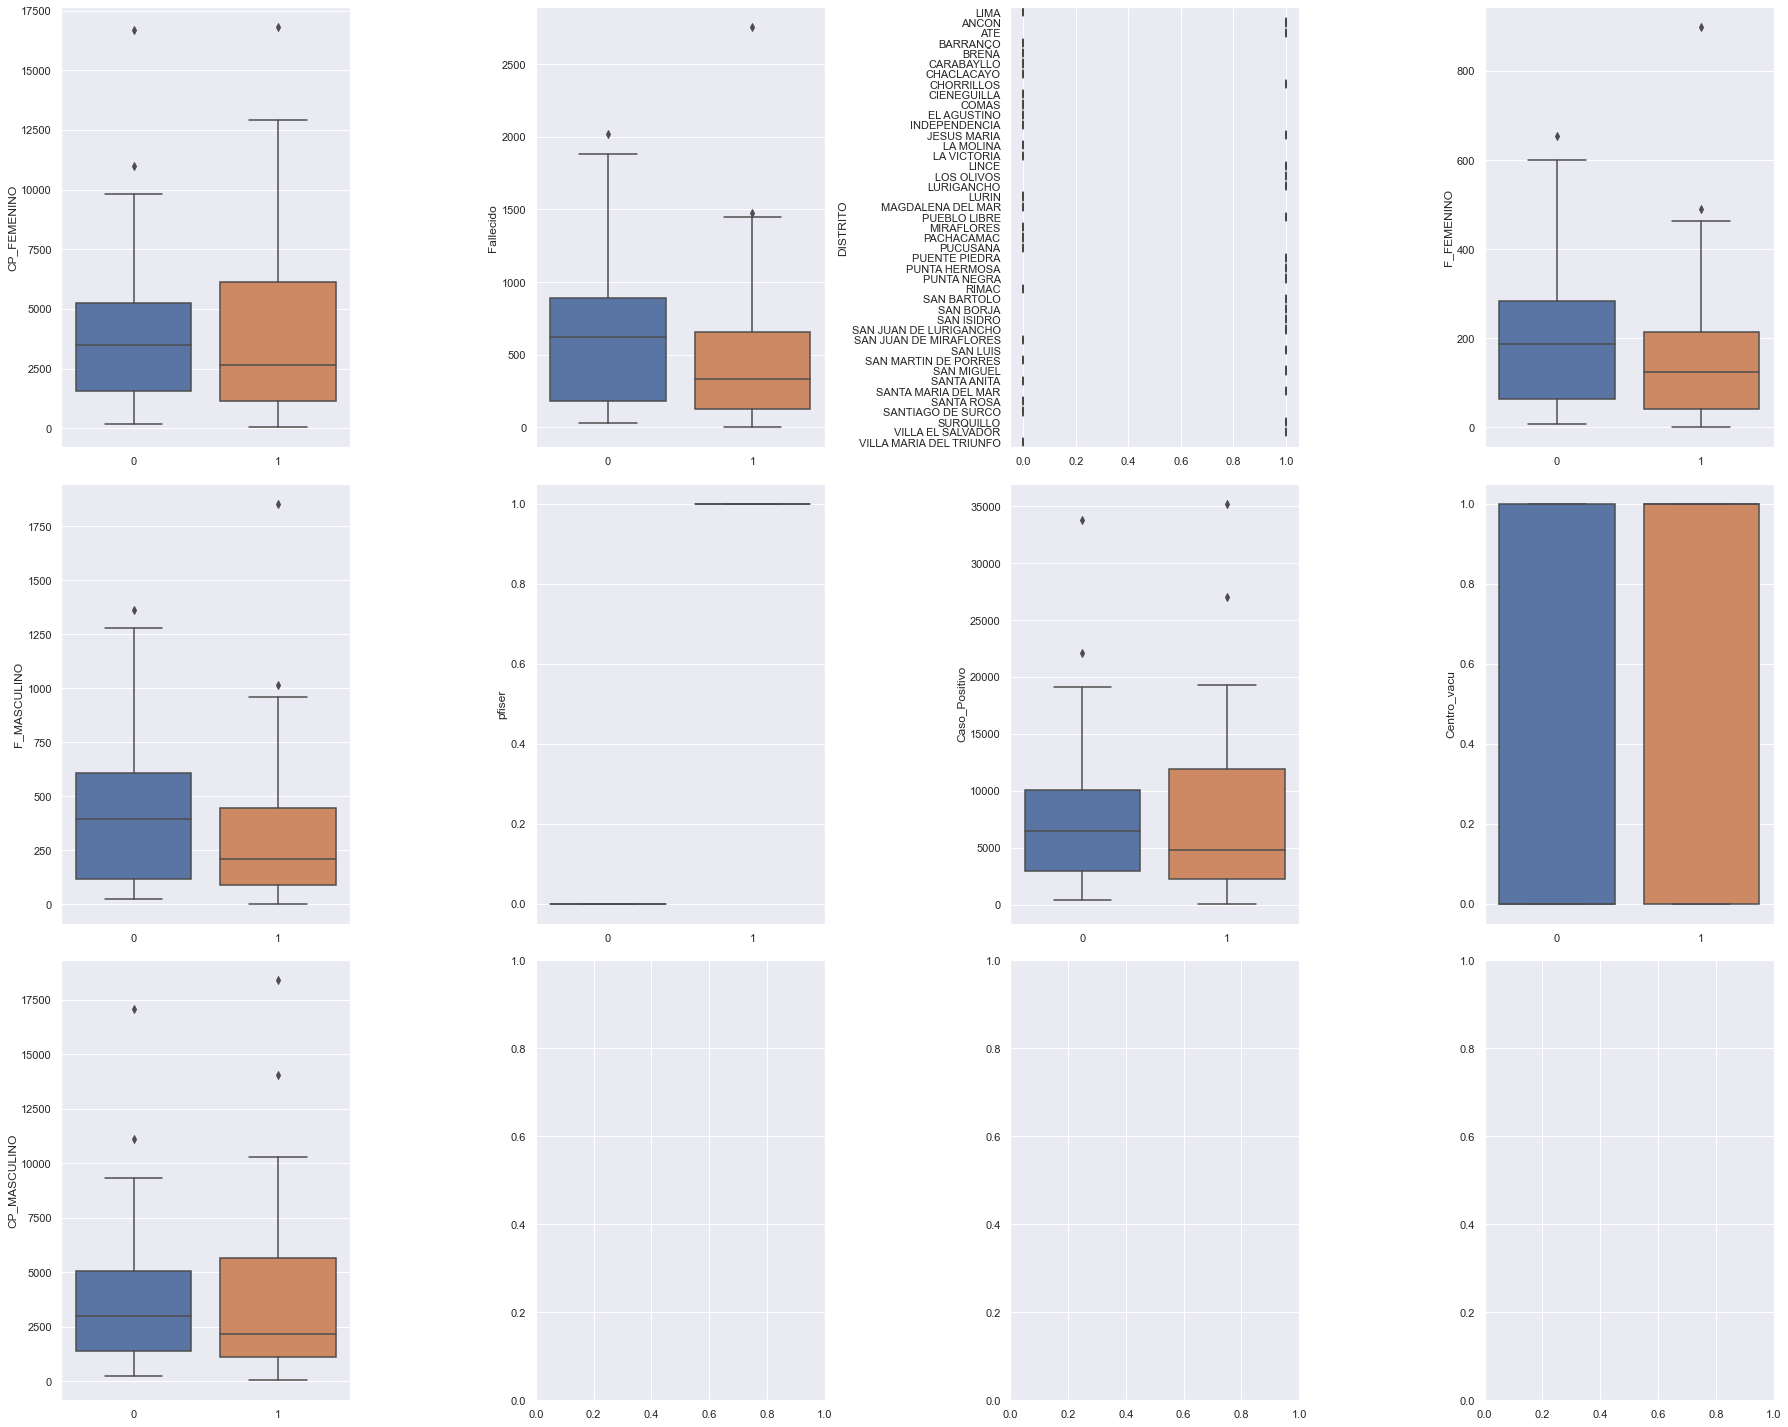

In [21]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25,20))
for idx, feat in enumerate(numerical_1):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="pfiser", y=feat, data=df_1, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

Veamos solo para una variables cuantitativa

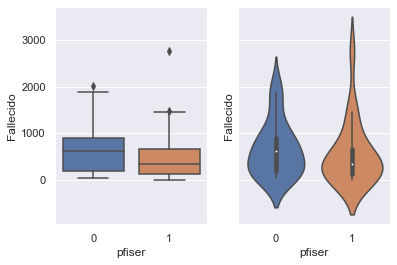

In [22]:
_, axes = plt.subplots(1, 2, sharey=True)

sns.boxplot(x="pfiser", y="Fallecido", data=df_1, ax=axes[0])
sns.violinplot(x="pfiser", y="Fallecido", data=df_1, ax=axes[1]);

Cuando deseamos analizar una variable cuantitativa en dos dimensiones categóricas al mismo tiempo, existe una función adecuada para esto en la biblioteca seaborn llamada `catplot()`.

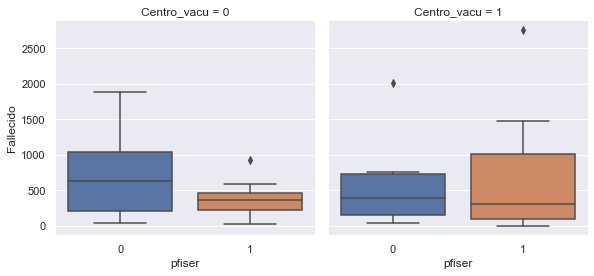

In [23]:
sns.catplot(
    x="pfiser",
    y="Fallecido",
    col="Centro_vacu",
    data=df_1,
    kind="box",
    col_wrap=4,
    height=4,
    aspect=1,
);

### 2.3 Categórico vs Categórico

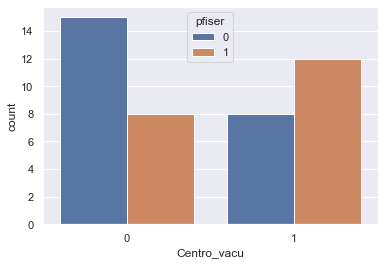

In [24]:
sns.countplot(x="Centro_vacu", hue="pfiser", data=df_1);

**Tabla de contigencia**

Además de utilizar medios gráficos para el análisis categórico, existe una herramienta tradicional en estadísticas: una tabla de contingencia, también llamada tabulación cruzada. Muestra una distribución de frecuencia multivariada de variables categóricas en forma de tabla. En particular, nos permite ver la distribución de una variable condicional a la otra al observar a lo largo de una columna o fila.

In [25]:
pd.crosstab(df_1["DISTRITO"], df_1["pfiser"]).T

DISTRITO,ANCON,ATE,BARRANCO,BREÑA,CARABAYLLO,CHACLACAYO,CHORRILLOS,CIENEGUILLA,COMAS,EL AGUSTINO,...,SAN LUIS,SAN MARTIN DE PORRES,SAN MIGUEL,SANTA ANITA,SANTA MARIA DEL MAR,SANTA ROSA,SANTIAGO DE SURCO,SURQUILLO,VILLA EL SALVADOR,VILLA MARIA DEL TRIUNFO
pfiser,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,1,0,1,1,1,...,0,1,0,1,0,1,1,0,0,1
1,1,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0


## 3. Visualización de todo el dataset

### 3.1 Naive Approach

Hasta ahora, hemos estado examinando diferentes aspectos de nuestro conjunto de datos adivinando características interesantes y seleccionando un pequeño número de ellas a la vez para la visualización. Solo hemos tratado con dos o tres variables a la vez y hemos podido observar fácilmente la estructura y las relaciones en los datos. Pero, ¿qué pasa si queremos mostrar todas las características y aún así ser capaces de interpretar la visualización resultante?

Podríamos usar `hist()` o crear una matriz de gráficos de dispersión con `pairplot()` para todo el conjunto de datos y ver todas nuestras características simultáneamente. Sin embargo, cuando el número de características es lo suficientemente alto, este tipo de análisis visual rápidamente se vuelve lento e ineficiente. Además, seguiríamos analizando nuestras variables de manera pareja, no todas a la vez.

### 3.2 Dimensionaly Reduction (reducción de dimensiones)

La mayoría de los conjuntos de datos del mundo real tienen muchas características, a veces, muchas miles de ellas. Cada una de ellas puede considerarse como una dimensión en el espacio de los puntos de datos. En consecuencia, con mucha frecuencia, nos encontramos con conjuntos de datos de alta dimensionalidad, donde la visualización completa es bastante difícil.

Para analizar un conjunto de datos en su totalidad, necesitamos reducir el número de dimensiones utilizadas en la visualización sin perder mucha información sobre los datos. Esta tarea se llama reducción de dimensionalidad y es un ejemplo de un problema de aprendizaje no supervisado, ya que debemos derivar nuevas características de baja dimensionalidad a partir de los propios datos, sin ninguna entrada supervisada.

Uno de los métodos de reducción de dimensionalidad más conocidos es el Análisis de Componentes Principales (PCA), que estudiaremos más adelante en este curso. Su limitación es que es un algoritmo lineal que implica ciertas restricciones en los datos.

También existen muchos métodos no lineales, conocidos colectivamente como Aprendizaje de Manifolds. Uno de los más conocidos de ellos es t-SNE.

### 3.3 t-SNE

El nombre del método parece complejo y un poco intimidante: t-distributed Stochastic Neighbor Embedding. Su matemática también es impresionante (no profundizaremos en ella aquí, pero si te sientes valiente, aquí está el artículo original de Laurens van der Maaten y Geoffrey Hinton en JMLR). Su idea básica es simple: encontrar una proyección para un espacio de características de alta dimensión en un plano (o un hiperplano en 3D, pero casi siempre es 2D) de modo que los puntos que estaban distantes en el espacio inicial de n dimensiones terminarán distantes en el plano. Aquellos que estaban originalmente cerca permanecerían cerca entre sí.

Básicamente, el "neighbor embedding" (incrustación de vecinos) es una búsqueda de una nueva representación de datos con menos dimensiones que preserve las relaciones de vecindad entre ejemplos.

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Dejaremos fuera las características "pfiser" y "Centro_vacu" y convertiremos los valores "Yes" y "No" de las características binarias en valores numéricos utilizando `pandas.Series.map()`:

In [33]:
X = df_1.drop(["pfiser", "Centro_vacu","DISTRITO", "UBIGEO"], axis=1)
X["Fallecido"] = X["Fallecido"].map({"Yes": 1, "No": 0})
X["Caso_Positivo"] = X["Caso_Positivo"].map({"Yes": 1, "No": 0})

También necesitamos normalizar los datos. Para ello, restaremos la media de cada variable y la dividiremos por su desviación estándar. Todo esto se puede hacer con `StandardScaler`.

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [52]:
X_scaled_without_nan = X_scaled[:, ~np.isnan(X_scaled).any(axis=0)] #Corregir data ya que tenia valores NAN

In [54]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled_without_nan)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1.91 s
Wall time: 289 ms


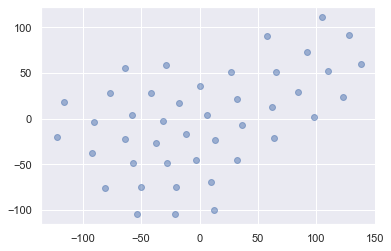

In [59]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

Aplicando color a la data

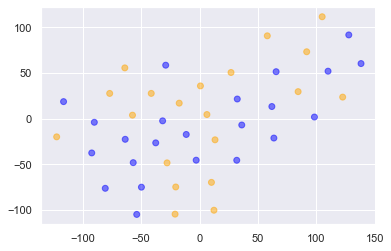

In [63]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df_1["pfiser"].map({0: "blue", 1: "orange"}),
    alpha=0.5,
);

Para entender mejor la imagen, también podemos colorearla con las características binarias restantes.

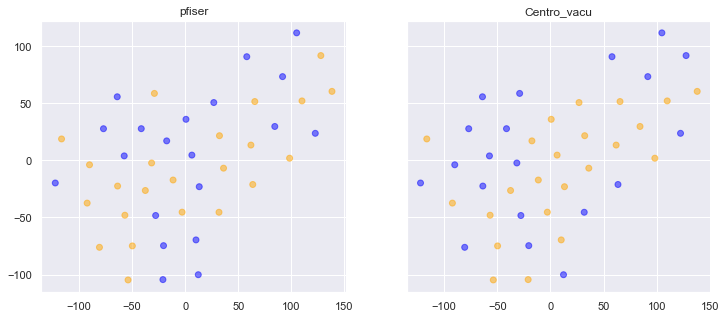

In [65]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["pfiser", "Centro_vacu"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df_1[name].map({0: "orange", 1: "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);

Desventajas de t-SNE:

1. Alta complejidad computacional. La implementación en scikit-learn es poco probable que sea factible en una tarea real. Si tienes un gran número de muestras, deberías considerar utilizar Multicore-TSNE en su lugar.

2. El gráfico puede cambiar considerablemente dependiendo de la semilla aleatoria, lo que complica la interpretación. Aquí tienes un buen tutorial sobre t-SNE. En general, no deberías llegar a conclusiones trascendentales basadas en tales gráficos, ya que esto puede equivaler a un simple intento adivinatorio. Por supuesto, algunas observaciones en las imágenes de t-SNE pueden inspirar una idea que luego se confirma a través de una investigación más exhaustiva, pero esto no ocurre muy a menudo.

3. Ocasionalmente, al utilizar t-SNE, puedes obtener una intuición realmente buena sobre los datos.